# Download and prepare the dataset

In [ ]:
# # Download the train set
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps.zip
    
# # Download the test set
# !wget https://storage.googleapis.com/tensorflow-1-public/course2/week4/rps-test-set.zip

In [8]:
import zipfile
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
local_zip='datasets/rps.zip'
zip_ref=zipfile.ZipFile(local_zip)
zip_ref.extractall('datasets/rps')
local_Zip='datasets/rps-test-set.zip'
zip_ref=zipfile.ZipFile(local_zip)
zip_ref.extractall('datasets/rps-test-set')
zip_ref.close()

In [6]:
base_dir='datasets/rps/'

rock_dir=os.path.join(base_dir,'rock')
paper_dir=os.path.join(base_dir,'paper')
scissor_dir=os.path.join(base_dir,'scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissor images:', len(os.listdir(scissor_dir)))

total training rock images: 840
total training paper images: 840
total training scissor images: 840


# visualize the images 

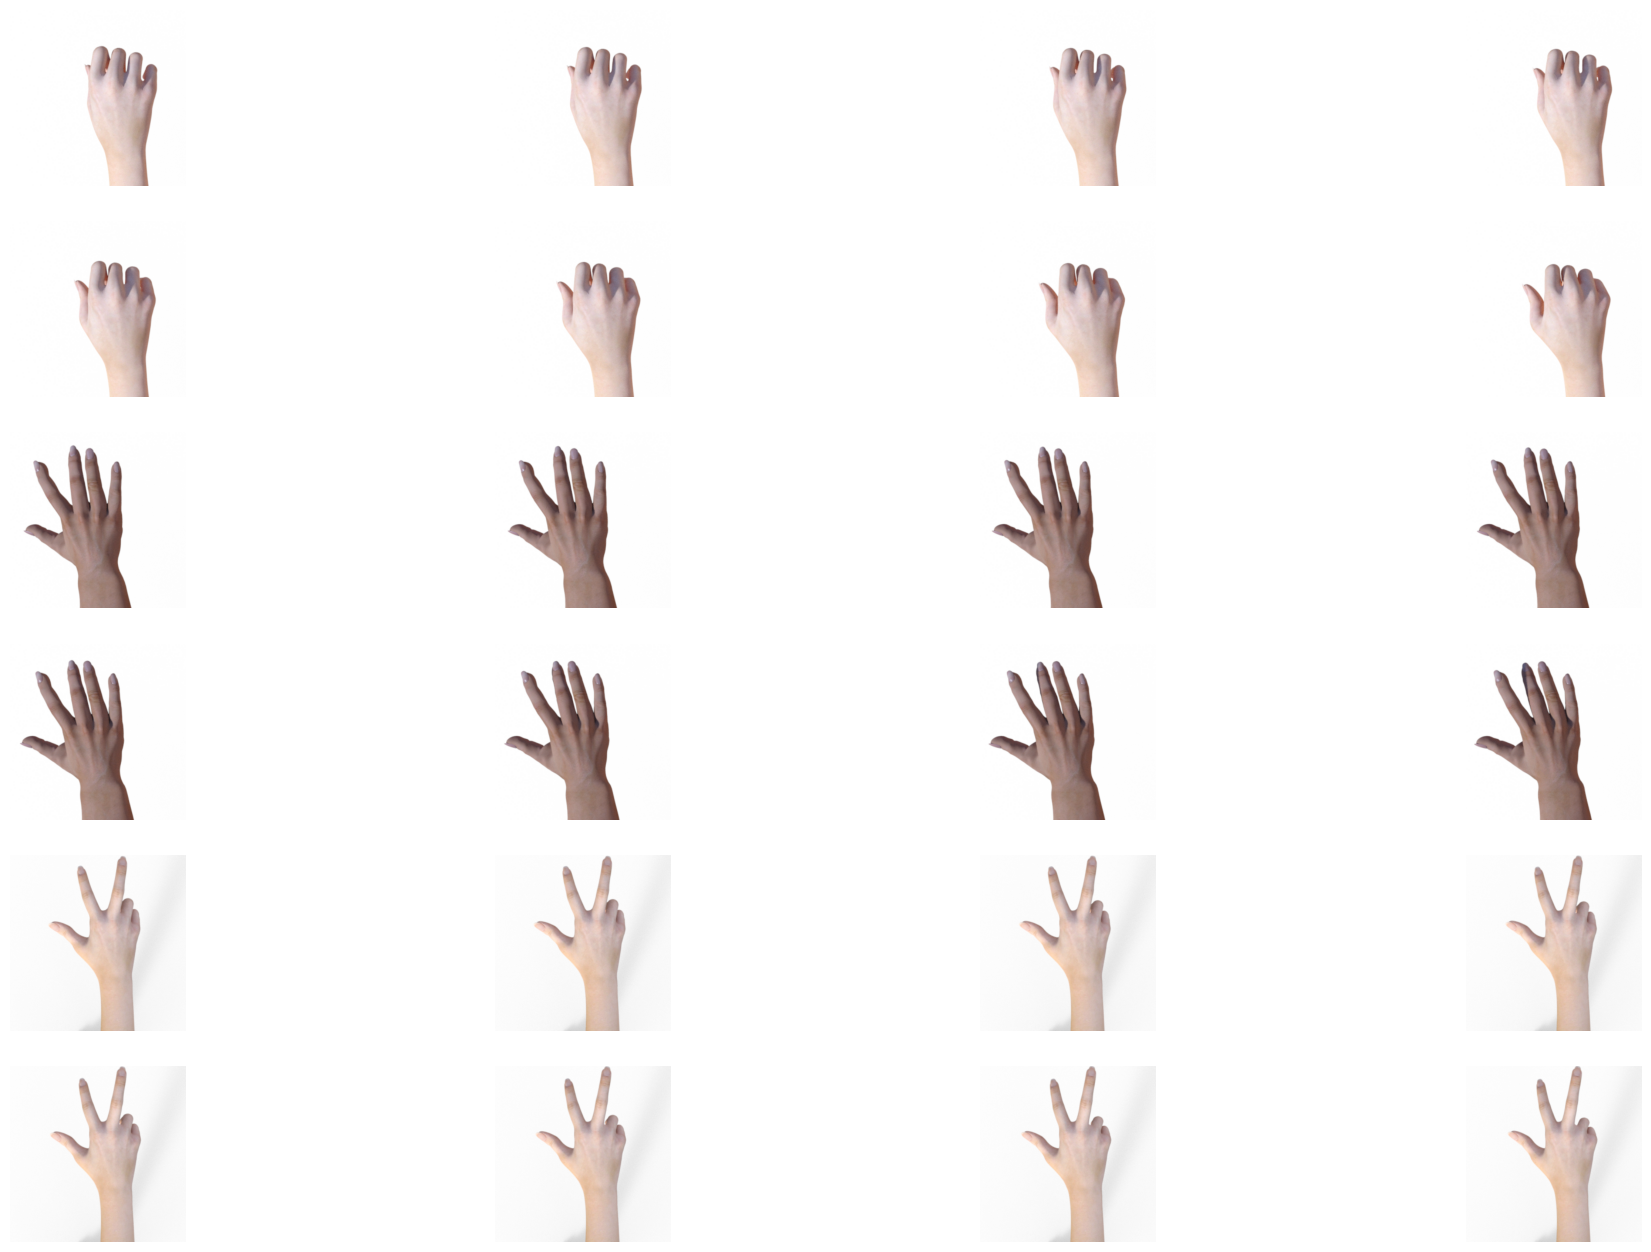

In [30]:
fig=plt.gcf()
nrows=6
ncols=4
fig.set_size_inches(4*nrows,ncols*4)
pic_index+=8
next_rock=[os.path.join(rock_dir,fname) for fname in os.listdir(rock_dir)[pic_index-8:pic_index]]
next_paper=[os.path.join(paper_dir,fname) for fname in os.listdir(paper_dir)[pic_index-8:pic_index]]
next_scissors=[os.path.join(scissor_dir,fname) for fname in os.listdir(scissor_dir)[pic_index-8:pic_index]]
for i, img_name in enumerate(next_rock+next_paper+next_scissors):
    sp=plt.subplot(nrows,ncols,i+1)
    sp.axis('Off')
    img=mpimg.imread(img_name)
    plt.imshow(img)
plt.show()

# build the model

In [31]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
    
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [32]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# prepare the ImageDataGenerator

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR='datasets/rps/'
training_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR='datasets/rps-test-set/'
validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

validation_generator=validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
    batch_size=126
)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


# train the model and evaluate the results

In [36]:
history=model.fit(train_generator,
                  epochs=25, 
                  steps_per_epoch=20, 
                  validation_data = validation_generator, 
                  verbose = 1, 
                  validation_steps=3
                 )

Epoch 1/25
20/20 [==============================] - 38s 1s/step - loss: 1.2591 - accuracy: 0.3639 - val_loss: 1.0914 - val_accuracy: 0.3333
Epoch 2/25
20/20 [==============================] - 14s 713ms/step - loss: 1.1110 - accuracy: 0.3667 - val_loss: 1.0820 - val_accuracy: 0.5134
Epoch 3/25
20/20 [==============================] - 14s 692ms/step - loss: 1.1056 - accuracy: 0.4206 - val_loss: 1.0775 - val_accuracy: 0.4462
Epoch 4/25
20/20 [==============================] - 15s 724ms/step - loss: 1.0735 - accuracy: 0.5159 - val_loss: 0.9389 - val_accuracy: 0.5618
Epoch 5/25
20/20 [==============================] - 14s 691ms/step - loss: 0.8383 - accuracy: 0.6044 - val_loss: 0.6332 - val_accuracy: 0.6452
Epoch 6/25
20/20 [==============================] - 13s 665ms/step - loss: 0.7295 - accuracy: 0.6885 - val_loss: 0.2665 - val_accuracy: 0.9677
Epoch 7/25
20/20 [==============================] - 13s 655ms/step - loss: 0.6008 - accuracy: 0.7528 - val_loss: 0.2673 - val_accuracy: 0.8925
Ep

# evaluate the results

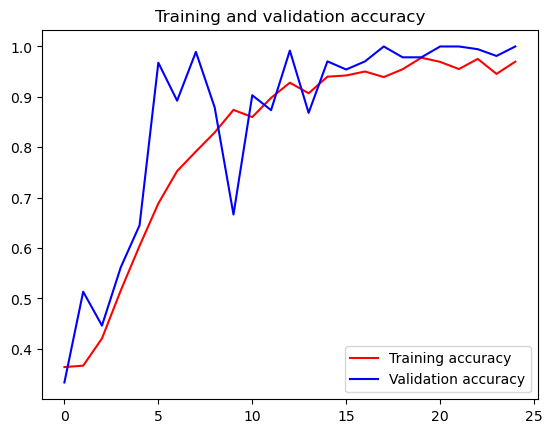

<Figure size 640x480 with 0 Axes>

In [39]:
import matplotlib.pyplot as plt

acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

# Model Prediction

In [42]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

In [46]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

image_directory='datasets/prediction/rockpaperscissors/'
image_files=os.listdir(image_directory)
images=[]
for image_file in image_files:
    image_path=os.path.join(image_directory,image_file)
    image=load_img(image_path,target_size=(150,150))
    image_array=img_to_array(image)
    image_array/=255.0
    x=np.expand_dims(image_array,axis=0)
    images=np.vstack([x])
    classes=model.predict(images,batch_size=10)
    print(classes[0])
    if classes[0][1]>0.5:
        print(image_file + 'is a paper')
    elif classes[0][2]>0.5:
        print(image_file + 'is a rock')
    elif classes[0][3]>0.5:
        print(image_file + 'is a scissor')

1/1 [==============================] - 0s 20ms/step
[2.5657723e-03 9.9727792e-01 1.5638473e-04]
paper.jpegis a paper
1/1 [==============================] - 0s 17ms/step
[2.7216455e-01 1.8106699e-05 7.2781736e-01]
paper2.jpgis a rock
1/1 [==============================] - 0s 17ms/step
[0.20604669 0.2776244  0.51632893]
paper3.jpgis a rock
1/1 [==============================] - 0s 16ms/step
[7.3517975e-04 9.9874699e-01 5.1774940e-04]
rock.jpegis a paper
1/1 [==============================] - 0s 16ms/step
[0.02042972 0.00943086 0.9701394 ]
scissors.jpegis a rock
1/1 [==============================] - 0s 16ms/step
[0.01458234 0.00313509 0.9822826 ]
scissors2.jpegis a rock
